o código abaixo verificar o que tem dentro do Arquivo.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
caminho_arquivo = 'basededados/MiniBooNE_PID.txt'
data = pd.read_csv(caminho_arquivo, delimiter='\s+', header=None, skiprows=1)

# Verificar as primeiras linhas
print("Primeiras linhas dos dados:")
print(data.head())

# Verificar estatísticas básicas de cada coluna
print("\nEstatísticas descritivas:")
print(data.describe())

# Verificar informações básicas
print("\nInformações sobre o dataset:")
print(data.info())

# Verificar valores únicos em cada coluna (útil para identificar rótulos binários)
print("\nValores únicos por coluna:")
for col in data.columns:
    print(f"Coluna {col}: {data[col].unique()}")

# Plotar histogramas para cada coluna
data.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd
# carregar bibliótecas necessárias



## carregar o Arquivo e coloca em um rótulo baseado no seu valor
**caso o Arquivo contém dados irreguláres será necessário modifica o código ou adapta os dados**

In [ ]:
import pandas as pd
import numpy as np

# Caminho para o arquivo (substitua pelo caminho correto)
caminho_arquivo = 'basededados/MiniBooNE_PID.txt'

# Carregar os dados
try:
    # Ler a primeira linha para obter o número de eventos de sinal e fundo
    with open(caminho_arquivo, 'r') as file:
        primeira_linha = file.readline().strip().split()
        num_sinal = int(primeira_linha[0])  # Número de eventos de sinal
        num_fundo = int(primeira_linha[1])  # Número de eventos de fundo

    # Carregar os dados a partir da segunda linha
    data = pd.read_csv(caminho_arquivo, delimiter='\s+', header=None, skiprows=1)

    # Adicionar uma coluna de rótulos
    # 1 para sinal, -1 para fundo
    y = np.concatenate([np.ones(num_sinal), np.ones(num_fundo) * -1])
    data['label'] = y

    print("Dados carregados com sucesso!")
    print("Formato dos dados:", data.shape)
    print("\nPrimeiras linhas dos dados:")
    print(data.head())

except Exception as e:
    print(f"Erro ao carregar o arquivo: {e}")

# Reduzir o número de dados para 10000 (opcional)
data_reduzido = data.sample(n=10000, random_state=10)

# Separar features (X) e rótulos (y)
X = data_reduzido.iloc[:, :-1].values  # Todas as colunas, exceto a última (rótulos)
y = data_reduzido.iloc[:, -1].values   # Última coluna (rótulos)

# Verificar os dados reduzidos
print("\nFormato dos dados reduzidos (X_reduzido):", X.shape)
print("Formato dos rótulos reduzidos (y_reduzido):", y.shape)

Dados carregados com sucesso!
Formato dos dados: (130064, 51)

Primeiras linhas dos dados:
         0         1         2         3         4         5         6  \
0  2.59413  0.468803   20.6916  0.322648  0.009682  0.374393  0.803479   
1  3.86388  0.645781   18.1375  0.233529  0.030733  0.361239  1.069740   
2  3.38584  1.197140   36.0807  0.200866  0.017341  0.260841  1.108950   
3  4.28524  0.510155  674.2010  0.281923  0.009174  0.000000  0.998822   
4  5.93662  0.832993   59.8796  0.232853  0.025066  0.233556  1.370040   

          7        8         9  ...       41        42       43        44  \
0  0.896592  3.59665  0.249282  ... -31.3730  0.442259  5.86453  0.000000   
1  0.878714  3.59243  0.200793  ...  45.9597 -0.478507  6.11126  0.001182   
2  0.884405  3.43159  0.177167  ... -11.5608 -0.297008  8.27204  0.003854   
3  0.823390  3.16382  0.171678  ... -18.4586  0.453886  2.48112  0.000000   
4  0.787424  3.66546  0.174862  ...  42.9600 -0.975752  2.66109  0.000000   

 

In [ ]:
# Verificar a distribuição das classes
from collections import Counter

class_counts = Counter(y)
print("\nDistribuição original das classes:")
print(f"Classe 1 (sinal): {class_counts[1]} amostras")
print(f"Classe -1 (fundo): {class_counts[-1]} amostras")
print(f"Proporção: {class_counts[1]}:{class_counts[-1]}")

foi necessário usar um undersample para balancear os dados, caso o perceptron erra muito deve utiliza essa função abaixo algumas vezes para embaralhar os dados.

In [ ]:
def manual_undersample(X, y):
    # Contar as classes
    class_counts = Counter(y)
    minority_class = min(class_counts, key=class_counts.get)
    minority_count = class_counts[minority_class]

    # Separar por classes
    class_indices = {cls: np.where(y == cls)[0] for cls in class_counts}

    # Amostrar aleatoriamente
    sampled_indices = []
    for cls in class_counts:
        indices = class_indices[cls]
        if len(indices) > minority_count:
            indices = np.random.choice(indices, size=minority_count, replace=False)
        sampled_indices.extend(indices)

    # Embaralhar os índices
    np.random.shuffle(sampled_indices)

    return X[sampled_indices], y[sampled_indices]

# Aplicar undersampling
X_under, y_under = manual_undersample(X, y)

# Verificar o resultado
print("\nApós undersampling:")
print(f"Classe 1: {sum(y_under == 1)}")
print(f"Classe -1: {sum(y_under == -1)}")


Após undersampling:
Classe 1: 2747
Classe -1: 2747


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=45)
'''essa função separa os dados de X e Y entre treinamento e teste onde o test_size dividi em portagem,
exemplo, 0.2% 20% para teste e 80% para treino '''

print("Dados de treino (X_train):")
print(X_train)
print("Rótulos de treino (y_train):")
print(y_train)

print("\nDados de teste (X_test):")
print(X_test)
print("Rótulos de teste (y_test):")
print(y_test)

Dados de treino (X_train):
[[4.83708e+00 1.61674e+00 1.38859e+02 ... 1.41544e+00 1.18472e+00
  2.82234e-01]
 [5.07715e+00 9.87028e-01 2.81045e+01 ... 7.38397e+00 2.13422e-01
  2.64591e-01]
 [3.96216e+00 7.73405e-01 2.59313e+01 ... 1.68742e+00 1.62140e+00
  2.82059e-01]
 ...
 [6.97826e+00 9.29197e-01 5.52712e+01 ... 3.61695e+00 1.41238e+00
  2.23881e-01]
 [5.49614e+00 2.20617e+00 3.97272e+02 ... 3.17262e+00 1.44371e+00
  1.98466e-01]
 [4.13982e+00 2.07262e+00 1.19088e+00 ... 3.04618e+00 1.74303e+00
  2.98091e-01]]
Rótulos de treino (y_train):
[-1.  1.  1. ... -1. -1.  1.]

Dados de teste (X_test):
[[ 3.86742e+00  5.78216e-01  1.23618e+01 ...  1.25207e+00  2.47402e+00
   2.50234e-01]
 [ 6.66554e+00  1.71790e+00  9.92258e+01 ...  9.93864e+00  9.02625e+00
   2.10986e-01]
 [ 4.68095e+00  1.62644e+00  1.48455e+02 ...  6.23500e+00  2.07270e+00
   2.95858e-01]
 ...
 [ 3.74089e+00  1.04701e+00  1.55647e+02 ...  1.48513e+00 -4.12101e-02
   1.89086e-01]
 [ 3.56047e+00  8.23085e-01  1.89671e+02 ..

In [ ]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate # taxa de aprendizado se for um valor baixo 0.001% então o acerto é alto mas demorado
        self.n_iters = n_iters # quantidades de interações em todos os conjuntos
        self.weights = None  # peso iniciado como none
        self.bias = None # bias como none
        self.errors = [] # quantidades de erros

    def fit(self, X, y):
        n_samples, n_features = X.shape # dividi entre linhas e colunas os pares de dados

        # Inicializar pesos e bias
        self.weights = np.zeros(n_features) # os pesos são iniciados em zero um para cada coluna
        self.bias = 0 # bias iniciado em zero

        ocorrencia=0 # para registra ocorrência de zero erro

        # Treinamento
        for _ in range(self.n_iters): # aqui acontece a quantidade de interação
            error = 0  # Contador de erros para a época atual
            for idx, x_i in enumerate(X): # X é separado entre conjuto x_i e o idx
                linear_output = np.dot(x_i, self.weights) + self.bias
                '''
                  o np.dot retorna o resultado da multiplicação entre o conjuto e os pesos, depois soma ao bias
                '''
                y_pred = np.where(linear_output >= 0, 1, -1) #se o linear_output for maior que zero o y_pred recebe 1 caso contraio recebe zero
                '''
                    observação caso ocorra erro verificar se a saída é 1 e 0 ou 1 e -1 , deve se binário
                '''

                # Armazenar o número de erros da época atual
                if y_pred != y[idx]:
                    # Atualizar pesos e bias
                    update = self.lr * (y[idx] - y_pred) # subtraia o label verdadeiro pela previsão e depois multiplica pela taxa de aprendizado
                    self.weights += update * x_i # atualiza os pesos multiplicando o erro com o conjuto
                    self.bias += update #atualiza o bias
                    error += 1  # Incrementar o contador de erros
                else:
                    ocorrencia+=1 # se não tiver erros a var 'ocorrencia' é incrementada

                self.errors.append(error)

                # Parar se não houver erros e tiver mais de 500 ocorrências de zeros erros então assumi que perceptron foi bem treinado
                if error == 0 and ocorrencia > 500:
                    break

    def predict(self, X): # faz a previsão
        linear_output = np.dot(X, self.weights) + self.bias
        print(f'taxaDeAprendizado: {self.lr}')
        print(f'pesos: {self.weights}')
        return np.where(linear_output >= 0, 1, -1)

# Função para plotar a taxa de aprendizado (erros ao longo das épocas)
def plot_learning_curve(errors):
    plt.plot(range(len(errors)), errors, marker='o')
    plt.xlabel('Época')
    plt.ylabel('Número de erros')
    plt.title('Taxa de aprendizado ao longo das épocas')
    plt.grid(True)
    plt.show()

# Função para plotar a fronteira de decisão
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Prever a classe para cada ponto na grade
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotar a fronteira de decisão
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary')
    plt.show()


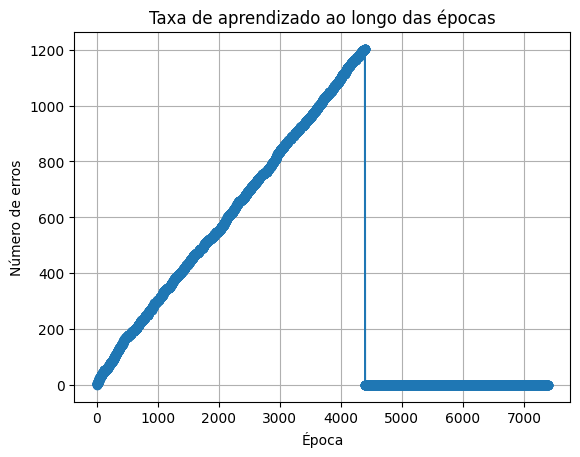

taxaDeAprendizado: 0.01
pesos: [ 10.78829     23.08755754  10.57429517  19.63034624  19.96523939
  20.68425814  21.92990682  20.07140272  18.7448706   20.308012
  19.6747366   -5.38944467  15.40727398  18.89043986  19.949592
  51.8153      20.59856288 -68.5775132   19.99626546  22.14298294
  29.82482591  19.97865764  66.9436256   25.889803    20.2222855
  29.19758014 -92.63198222  18.93499796  19.78419649  21.6265578
   9.2732528   23.1922244   18.08001978 -27.889352    20.11805407
  20.45391014  23.90052182  17.36254548  19.07583728  19.91679798
 -92.812352    85.06900981  24.06510568  -1.36229882  19.87032647
  19.70635277  22.12613946  15.90350999  15.84371622  20.04940948]


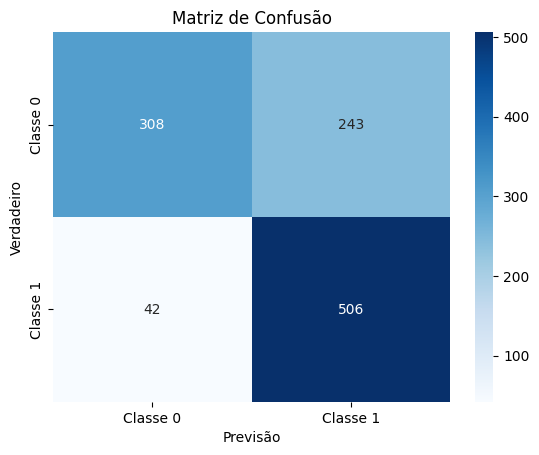

In [ ]:
# Criar e treinar o Perceptron
perceptron = Perceptron(learning_rate=0.01, n_iters=3000)
perceptron.fit(X_train, y_train)

# Plotar a fronteira de decisão caso seja 2 features
#plot_decision_boundary(X_test, y_test, perceptron)

# Plotar a taxa de aprendizado
plot_learning_curve(perceptron.errors)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, perceptron.predict(X_test))

# Plotar a matriz de confusão
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()